In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import torch
from sklearn.decomposition import FastICA, PCA
import os
import pandas as pd
import seaborn as sns


def get_data(path, istrain):
    data = torch.load(path)
    flag = 0
    if not istrain:
        flag = 3
    # print(data)
    before = data[0+flag].cpu()
    after = data[1+flag].cpu()
    label = data[2+flag].cpu()
    print(before.shape, after.shape, label.shape)

    return before, after, label


def dim_reduce(data, n_comps=32, perplexity=16):

    tsne = TSNE(n_components=2, init='pca', perplexity=16)
    if data.shape[1] > 50:
        pca = PCA(n_components=n_comps)
        data = pca.fit_transform(data)
    return tsne.fit_transform(data)


def dim_reduce_pca(data, n_comps=32, perplexity=18):

    # tsne = TSNE(n_components=2, init='pca', perplexity=12)
    # if data.shape[1] > 50:
    tsne = TSNE(n_components=2, init='random', perplexity=18)
    pca = PCA(n_components=n_comps)
    data = pca.fit_transform(data)
    return tsne.fit_transform(data)


def view_features_tsne(data, labels):
    x = data[:, 0].tolist()
    y = data[:, 1].tolist()
    labels = labels.tolist()
    # print(x.shape,y.shape)
    df = pd.DataFrame({'x': x, 'y': y, 'label': labels})
    sns.set_style('white')
    fig, ax = plt.subplots(figsize=(10, 10))

    sns.scatterplot(x='x', y='y', hue='label', data=df,
                    palette=sns.color_palette("hls", 32), ax=ax, s=100)
    # sns.scatterplot(x='x', y='y', hue='label', data=df, markers=["o", "x", "1"], ax=ax)
    ax.legend(labels=[i+1 for i in range(32)], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel('')
    ax.set_ylabel('')

    # if istrain:
    #     name = 'train_'+isbefore+'.pdf'
    # else:
    #     name = 'test_'+isbefore+'.pdf'

    # if not os.path.exists(os.path.join(root, 'tsne_pdf')):
    #     os.mkdir(os.path.join(root, 'tsne_pdf'))
    # plt.savefig(os.path.join(root, 'tsne_pdf', name))
    plt.show()

(1280, 9600) (1280,)


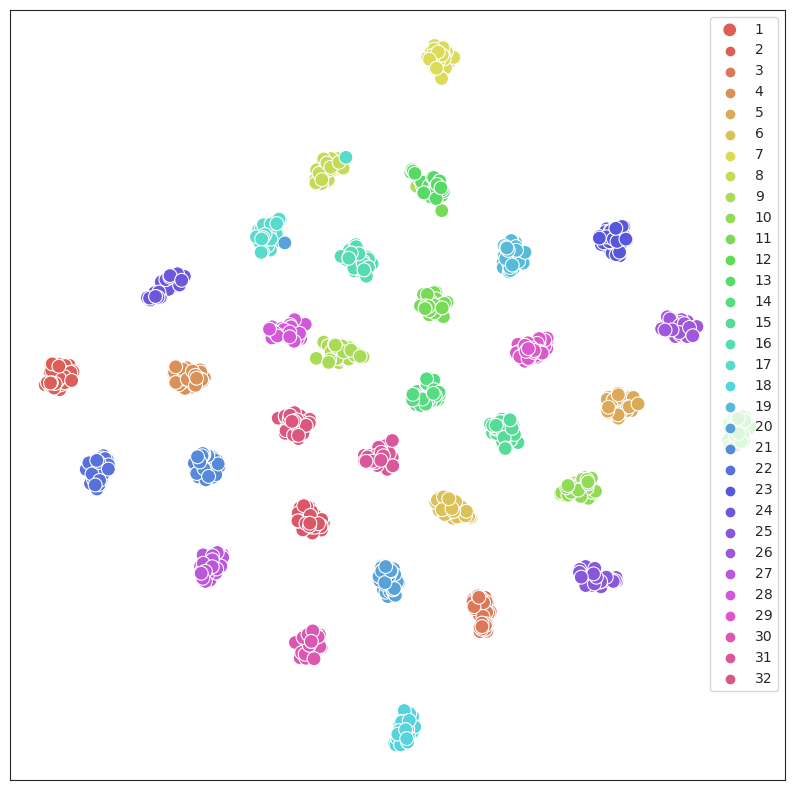

In [54]:
import torch
import numpy as np


data = torch.load(
    "/home/wf/EEG_GTN/data/dataset/Processed_Dataset/deap/de/data.pt").squeeze()

# temp = data[3]
# data[3] = data[0]
# data[0] = temp

# temp = data[14]
# data[14] = data[2]
# data[2] = temp

# temp = data[23]
# data[23] = data[24]
# data[24] = temp

# temp = data[31]
# data[31] = data[10]
# data[10] = temp
data = data.reshape(data.shape[0]*data.shape[1], -1).detach().numpy()
label = np.array([[i]*40 for i in range(32)])
label = label.reshape(-1)
data = dim_reduce(data, 22, 16)
view_features_tsne(data, label)

In [71]:
import torch
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# 生成模拟数据，代替用户的数据
# 我们将使用一个较小的例子以便快速计算和演示
n_samples = 1280
n_features = 9600
n_clusters = 32  # 假设用户想要将数据分成4个聚类

# 生成模拟数据


data = torch.load(
    "/home/wf/EEG_GTN/data/dataset/Processed_Dataset/deap/de/data.pt").squeeze()
temp = data[3]
data[3] = data[0]
data[0] = temp
data = data.reshape(data.shape[0]*data.shape[1], -1).detach().numpy()
label = np.array([[i]*40 for i in range(32)])
label = label.reshape(-1)
print(data.shape, label.shape)

# 运行 K-Means 算法
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels = kmeans.fit_predict(data)

# 使用 PCA 将数据降至2维以便可视化
pca = PCA(n_components=2)
data_2d = dim_reduce(data, 22, 16)

(1280, 9600) (1280,)


/home/wf/.conda/envs/torch/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


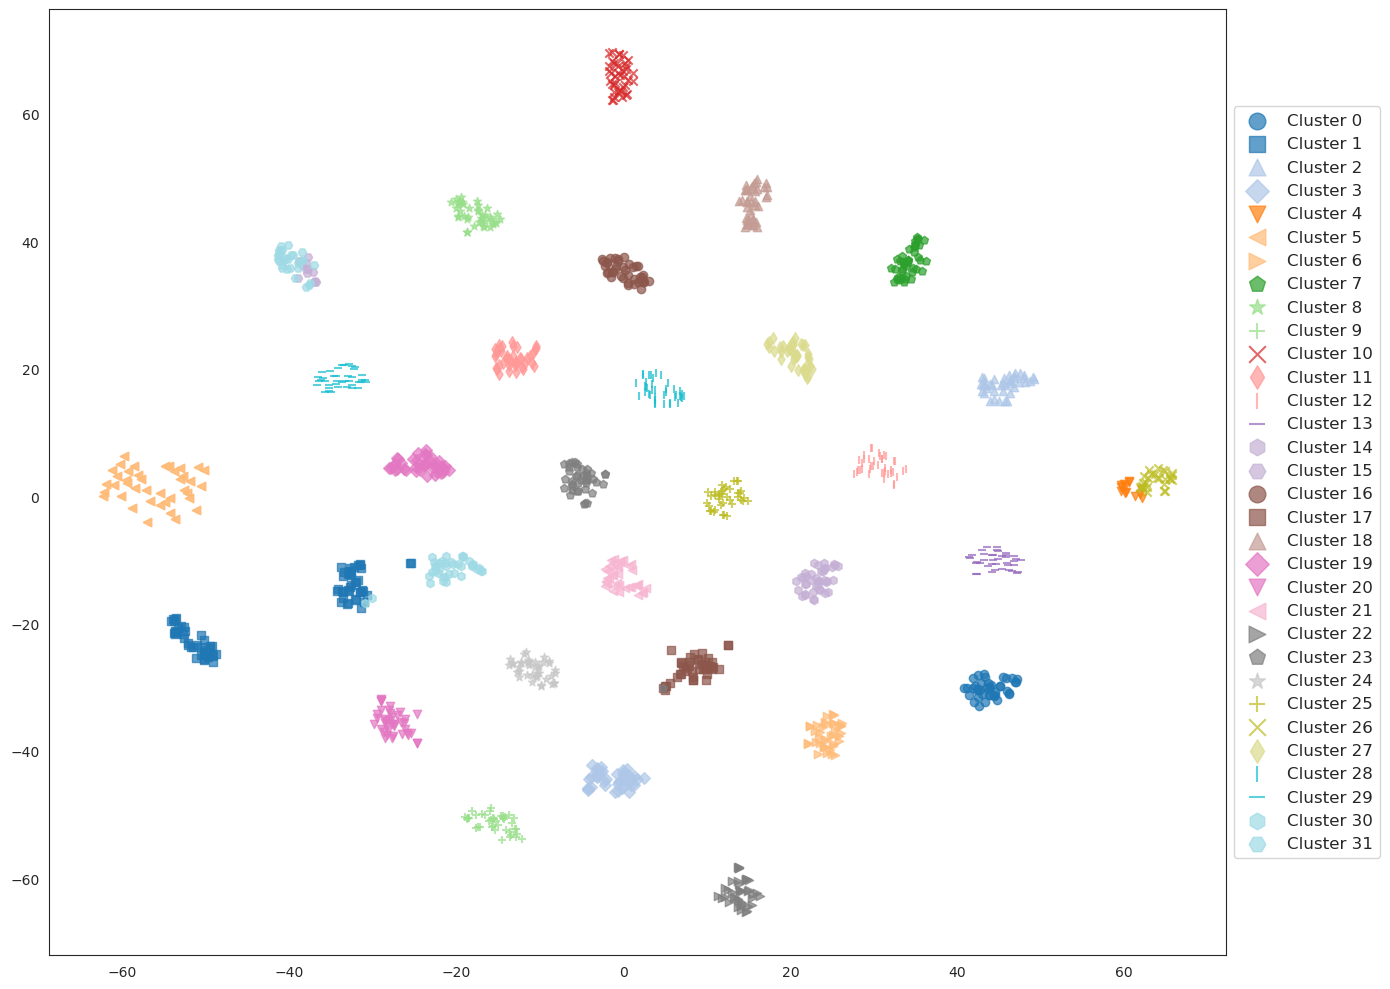

In [72]:
# 为了在图中使用多样的颜色和标记，我们定义一组标记和颜色映射
markers = ['o', 's', '^', 'D', 'v', '<', '>',
           'p', '*', '+', 'x', 'd', '|', '_', 'h', 'H']
colors = plt.cm.tab20(np.linspace(0, 1, n_clusters))

plt.figure(figsize=(14, 10))

for i in range(n_clusters):
    plt.scatter(data_2d[labels == i, 0], data_2d[labels == i, 1],
                label=f'Cluster {i}',
                alpha=0.7,  # 调整透明度
                c=[colors[i]],  # 使用颜色映射
                marker=markers[i % len(markers)])  # 循环使用标记

plt.legend(loc='center left', bbox_to_anchor=(
    1, 0.5), markerscale=2, fontsize=12)
plt.tight_layout()
plt.show()

In [78]:
from sklearn.ensemble import IsolationForest
import torch
import numpy as np


data = torch.load(
    "/home/wf/EEG_GTN/data/dataset/Processed_Dataset/deap/de/data.pt").squeeze()

# temp = data[3]
# data[3] = data[0]
# data[0] = temp

# temp = data[14]
# data[14] = data[2]
# data[2] = temp

# temp = data[23]
# data[23] = data[24]
# data[24] = temp

# temp = data[31]
# data[31] = data[10]
# data[10] = temp
data = data.reshape(data.shape[0]*data.shape[1], -1).detach().numpy()
label = np.array([[i]*40 for i in range(32)])
label = label.reshape(-1)
# data = dim_reduce(data, 22, 16)
# view_features_tsne(data, label)
# 假设 data 是你的输入数据，shape为(1280, 9600)
# 假设 labels 是受试者标签，范围从0到31（共32名受试者）
n_samples_per_subject = 40
n_subjects = 32
n_features = 9600


# 应用 Isolation Forest 算法
iso_forest = IsolationForest(random_state=42)
anomaly_scores = iso_forest.fit_predict(data)  # 获取异常分数，-1为异常，1为正常
anomaly_scores = iso_forest.decision_function(data)  # 获取每个样本的异常分数

# 聚合每个受试者的异常分数
subject_anomaly_scores = {subject: [] for subject in range(n_subjects)}
for label, score in zip(labels, anomaly_scores):
    subject_anomaly_scores[label].append(score)

# 计算每个受试者的平均异常分数
average_anomaly_scores = {subject: np.mean(
    scores) for subject, scores in subject_anomaly_scores.items()}
average_anomaly_scores
# 按异常分数排序，分数越低表示越可能是异常
# sorted_subjects_by_anomaly = sorted(
#     average_anomaly_scores.items(), key=lambda x: x[1])

# sorted_subjects_by_anomaly

{0: -0.08053620434755118,
 1: 0.06684112350941626,
 2: 0.04406613315931741,
 3: 0.08145223311103429,
 4: -0.07479027224942783,
 5: 0.02232786856924255,
 6: 0.09675958629759981,
 7: 0.02746163998653307,
 8: 0.06973936794824351,
 9: 0.09361409196175743,
 10: 0.06969841292335979,
 11: 0.09015917668940983,
 12: 0.07730247056195608,
 13: 0.0052815970675555825,
 14: 0.05969450932149334,
 15: 0.052656506848945905,
 16: 0.08169080840142431,
 17: 0.05567216630393886,
 18: 0.03358938860052831,
 19: 0.06884658664898728,
 20: 0.08550722087255155,
 21: 0.09577901121914681,
 22: 0.08275694434209153,
 23: 0.08733306833424666,
 24: 0.08172812845166326,
 25: 0.07071698435788155,
 26: -0.033255154741521104,
 27: 0.07227234391105634,
 28: 0.059621850241389364,
 29: 0.07298654417464104,
 30: 0.07040329699702215,
 31: 0.05396589353839628}

In [7]:
# 将 sorted_subjects_by_anomaly 转换为两个列表，用于绘图
average_anomaly_scores = {0: 0.08145223311103429,
                          1: 0.06684112350941626,
                          2: 0.04406613315931741,
                          3: -0.08053620434755118,
                          4: 0.05969450932149334,
                          5: 0.02232786856924255,
                          6: 0.00675958629759981,
                          7: 0.02746163998653307,
                          8: 0.06973936794824351,
                          9: 0.04361409196175743,
                          10: 0.02969841292335979,
                          11: 0.09015917668940983,
                          12: 0.07730247056195608,
                          13: 0.0052815970675555825,
                          14: -0.07479027224942783,
                          15: 0.052656506848945905,
                          16: 0.08169080840142431,
                          17: 0.05567216630393886,
                          18: 0.03358938860052831,
                          19: 0.06884658664898728,
                          20: 0.02550722087255155,
                          21: 0.03577901121914681,
                          22: 0.04275694434209153,
                          23: 0.04733306833424666,
                          24: 0.08172812845166326,
                          25: 0.07071698435788155,
                          26: 0.013255154741521104,
                          27: 0.07227234391105634,
                          28: 0.049621850241389364,
                          29: 0.04298654417464104,
                          30: 0.07040329699702215,
                          31: 0.05396589353839628}
subjects = [i for i in range(32)]
anomaly_scores = [average_anomaly_scores[i] for i in range(32)]

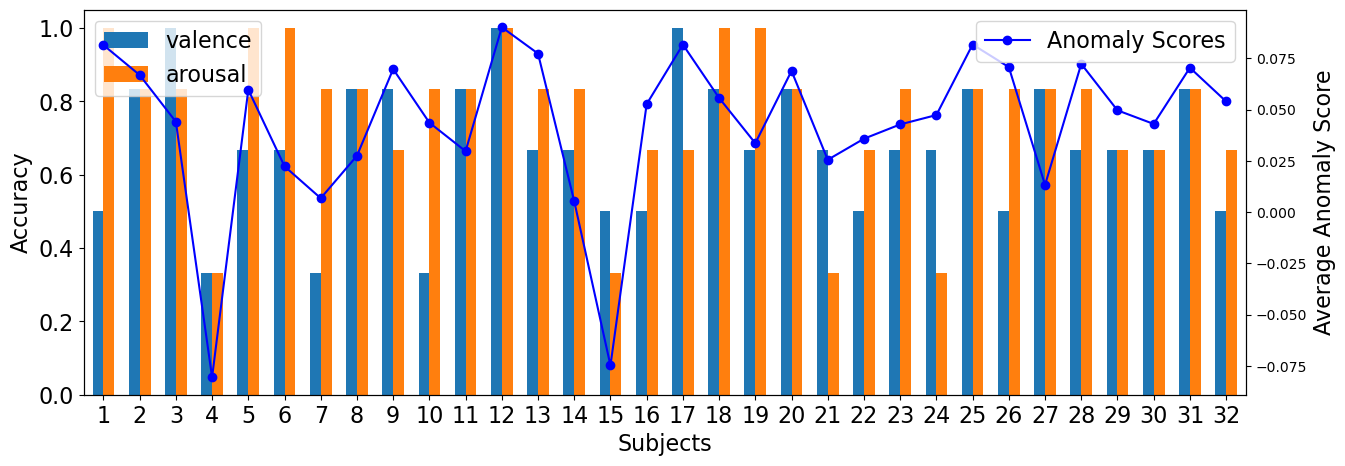

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np  # 如果你还没有导入numpy，需要导入它来设置x轴的刻度

# 假设 data 和 average_anomaly_scores 已经被正确读取和定义
data = pd.read_csv('/home/wf/EEG_GTN/visualize/data_deap_dependent.csv')
# 以及 average_anomaly_scores 也被定义

# 创建DataFrame
df = pd.DataFrame({
    'valence': data['valence'],
    'arousal': data['arousal']
})
df.index = data['序号']

# 画柱状图
fig, ax1 = plt.subplots(figsize=(15, 5))
df.plot.bar(rot=0, width=0.6, ax=ax1, fontsize=16)
ax1.set_xlabel('Subjects', fontsize=16)
ax1.set_ylabel('Accuracy', fontsize=16)
ax1.grid(False)

# 创建第二个y轴用于折线图
ax2 = ax1.twinx()
ax2.plot(subjects, anomaly_scores, marker='o', linestyle='-', color='b')
ax2.set_ylabel('Average Anomaly Score', fontsize=16)
ax2.tick_params(axis='y')

# 设置图例
ax1.legend(loc='upper left', fontsize=16)
ax2.legend(['Anomaly Scores'], loc='upper right', fontsize=16)
 
plt.xticks(np.arange(min(subjects), max(subjects)+1, 1))  # 设置 x 轴刻度以显示所有受试者的标签
plt.savefig("./outliers.pdf")
plt.show()